In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np

from utils_visualize import (
    get_result_table,
    plot_heatmap
)

pd.options.display.max_rows = 100

In [9]:
artifacts_fpath = '/local-scratch/nigam/projects/lguo/temp_ds_shift_robustness/clmbr/experiments/clmbr/adapter_artifacts'

## MODEL PERFORMANCE AND ROBUSTNESS

In [15]:
cmap = 'viridis'

y_axis = {
    'auc':{
        'lim':[-0.15, 0],
        'lim_raw':[0.75,.85],
        'label':'AUROC'
    },
    'auprc':{
        'lim':[-0.15, 0],
        'lim_raw':[.15,.35],
        'label':'AUPRC'
    },
    'ace_abs_logistic_logit':{
        'lim':[0, 0.10],
        'lim_raw':[0,0.05],
        'label':'Calibration'
    },
    'loss_bce':{
        'lim':[0, 0.4],
        'label':'BCE Loss'
    }
}

metrics = {
    'auc':'AUROC',
    'auprc':'AUPRC',
    'ace_abs_logistic_logit':'Calibration',
}

tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}

models = {
    'lr':'Logistic Regression',
    'gbm':'LightGBM'
}

train_years = {
    '2018':'18-18',
    '2017_2018':'17-18',
    '2016_2017_2018':'16-18',
    '2015_2016_2017_2018':'15-18',
    '2014_2015_2016_2017_2018':'14-18',
    '2013_2014_2015_2016_2017_2018':'13-18',
    '2012_2013_2014_2015_2016_2017_2018':'12-18',
    '2011_2012_2013_2014_2015_2016_2017_2018':'11-18',
    '2010_2011_2012_2013_2014_2015_2016_2017_2018':'10-18',
    '2009_2010_2011_2012_2013_2014_2015_2016_2017_2018':'09-18',
}

#### ID Performance

In [16]:
df = get_result_table(artifacts_fpath,train_years,tasks,metrics,models)
print("ID Performance of LR Models Trained on Various Year Groups With Increasing Sample Size and Diversity")
display(df[[v for k,v in train_years.items()]])

ID Performance of LR Models Trained on Various Year Groups With Increasing Sample Size and Diversity


Train Group                                        18-18  \
Model                                Logistic Regression   
Task                   Metric                              
In-Hospital Mortality  AUROC        0.973 (0.958, 0.983)   
                       AUPRC         0.54 (0.415, 0.656)   
                       Calibration  0.008 (0.005, 0.012)   
LOS > 7 Days           AUROC          0.886 (0.871, 0.9)   
                       AUPRC        0.662 (0.622, 0.698)   
                       Calibration  0.011 (0.003, 0.019)   
Readmission in 30 Days AUROC        0.813 (0.776, 0.849)   
                       AUPRC        0.288 (0.224, 0.367)   
                       Calibration  0.004 (0.001, 0.009)   
Admission to ICU       AUROC        0.924 (0.903, 0.944)   
                       AUPRC        0.374 (0.282, 0.467)   
                       Calibration  0.004 (0.001, 0.009)   

Train Group                                               \
Model                                           LightGBM   
Task                   Metric                              
In-Hospital Mortality  AUROC        0.947 (0.918, 0.968)   
                       AUPRC        0.479 (0.356, 0.595)   
                       Calibration   0.014 (0.01, 0.018)   
LOS > 7 Days           AUROC         0.894 (0.88, 0.906)   
                       AUPRC        0.681 (0.642, 0.716)   
                       Calibration  0.016 (0.008, 0.024)   
Readmission in 30 Days AUROC        0.796 (0.761, 0.832)   
                       AUPRC        0.317 (0.247, 0.391)   
                       Calibration  0.011 (0.006, 0.018)   
Admission to ICU       AUROC        0.899 (0.867, 0.926)   
                       AUPRC        0.363 (0.262, 0.465)   
                       Calibration  0.016 (0.011, 0.022)   

Train Group                                        17-18  \
Model                                Logistic Regression   
Task                   Metric                              
In-Hospital Mortality  AUROC        0.977 (0.969, 0.983)   
                       AUPRC         0.557 (0.46, 0.642)   
                       Calibration  0.003 (0.001, 0.006)   
LOS > 7 Days           AUROC        0.897 (0.888, 0.907)   
                       AUPRC        0.684 (0.653, 0.712)   
                       Calibration  0.005 (0.001, 0.011)   
Readmission in 30 Days AUROC        0.818 (0.791, 0.846)   
                       AUPRC        0.294 (0.241, 0.348)   
                       Calibration  0.003 (0.001, 0.007)   
Admission to ICU       AUROC        0.942 (0.925, 0.955)   
                       AUPRC        0.461 (0.386, 0.535)   
                       Calibration  0.004 (0.001, 0.008)   

Train Group                                               \
Model                                           LightGBM   
Task                   Metric                              
In-Hospital Mortality  AUROC        0.965 (0.954, 0.974)   
                       AUPRC        0.528 (0.433, 0.612)   
                       Calibration  0.012 (0.009, 0.015)   
LOS > 7 Days           AUROC        0.903 (0.893, 0.912)   
                       AUPRC        0.705 (0.677, 0.733)   
                       Calibration  0.013 (0.007, 0.019)   
Readmission in 30 Days AUROC        0.815 (0.788, 0.841)   
                       AUPRC        0.312 (0.253, 0.369)   
                       Calibration  0.007 (0.004, 0.011)   
Admission to ICU       AUROC         0.93 (0.909, 0.948)   
                       AUPRC        0.437 (0.363, 0.517)   
                       Calibration   0.014 (0.01, 0.017)   

Train Group                                        16-18  \
Model                                Logistic Regression   
Task                   Metric                              
In-Hospital Mortality  AUROC         0.977 (0.97, 0.982)   
                       AUPRC        0.539 (0.462, 0.615)   
                       Calibration  0.003 (0.001, 0.005)   
LOS > 7 Days           AUROC        

#### Heat Map OOD Performance in 2019, 2020, and 2021

/local-scratch/nigam/envs/lguo/temp_ds_shift_robustness/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


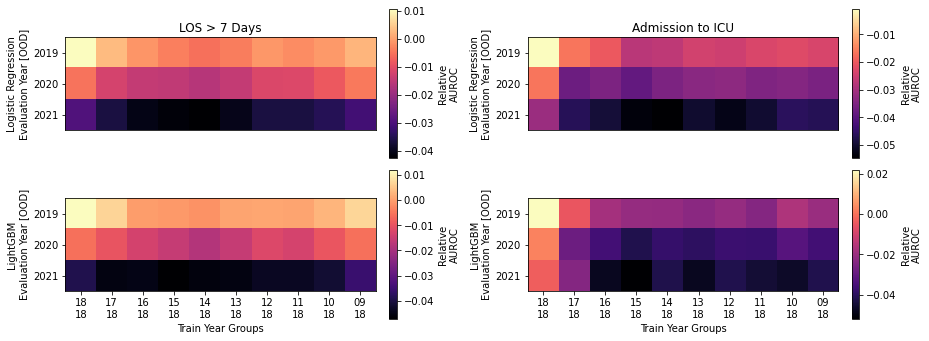

In [17]:
tasks = {
    'LOS_7':'LOS > 7 Days',
    'icu_admission':'Admission to ICU'
}

plot_heatmap(
    artifacts_fpath=artifacts_fpath,
    train_years=train_years,
    tasks=tasks,
    models=models,
    y_axis='auto',
    dv='delta',
    figsize=(13,5)
)

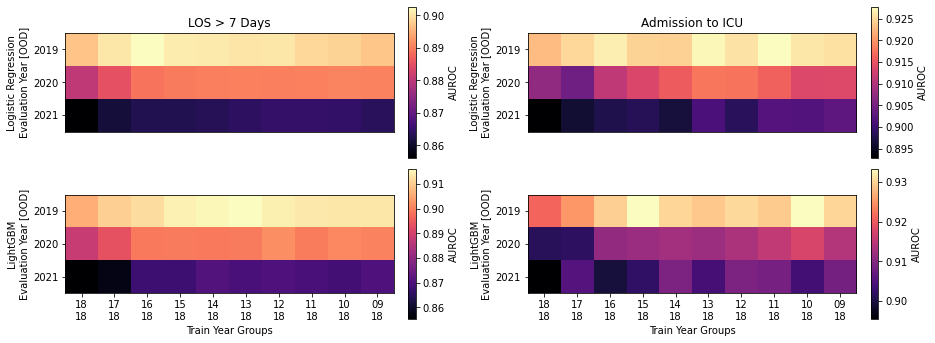

In [18]:
tasks = {
    'LOS_7':'LOS > 7 Days',
    'icu_admission':'Admission to ICU'
}

plot_heatmap(
    artifacts_fpath=artifacts_fpath,
    train_years=train_years,
    tasks=tasks,
    models=models,
    y_axis='auto',
    dv='comparator',
    figsize=(13,5)
)